### Example 6.5.1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
x = linspace(-1.5,1.5,1000)
y = linspace(-1.5,1.5,1000)

In [10]:
### Create mesh
X, Y = meshgrid(x,y)

In [11]:
### Define xdot and ydot

def x_dot(x, y, b):
    return y

def y_dot(x,y,b):
    return -x**3+x-b*y

In [12]:
### Euler and Runge-Kutta integrators
def intgrator_euler(xn, yn, dt, b):
    
    xnp = xn + dt*x_dot(xn, yn, b)
    ynp = yn + dt*y_dot(xn, yn, b)
    return xnp, ynp

def intgrator_rk4(xn, yn, dt, b):
    
    k1x = x_dot(xn, yn, b)*dt
    k1y = y_dot(xn, yn, b)*dt
    
    k2x = x_dot(xn+0.5*k1x, yn+0.5*k1y, b)*dt
    k2y = y_dot(xn+0.5*k1x, yn+0.5*k1y, b)*dt
    
    k3x = x_dot(xn+0.5*k2x, yn+0.5*k2y, b)*dt
    k3y = y_dot(xn+0.5*k2x, yn+0.5*k2y, b)*dt
    
    k4x = x_dot(xn+k3x,yn+k3y, b)*dt
    k4y = y_dot(xn+k3x,yn+k3y, b)*dt
    
    xnp = xn + 1./6*(k1x+2*k2x+2*k3x+k4x)
    ynp = yn + 1./6*(k1y+2*k2y+2*k3y+k4y)
    
    return xnp, ynp

Text(0,0.5,'$y$')

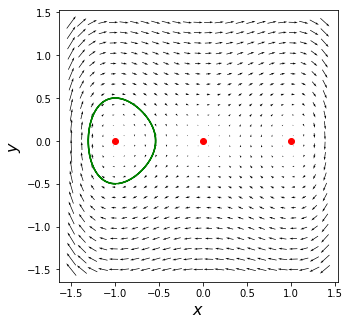

In [20]:
### Set the values of xdot and ydot all over the mesh
xdot = x_dot(X,Y, b=0.)
ydot = y_dot(X,Y, b=0.)

### Create figure
fig = figure(figsize=(5,5))
ax  = subplot(1,1,1)

### Plot vector field (one vector every 40 points)
ax.quiver(X[::40, ::40], Y[::40, ::40], xdot[::40, ::40], ydot[::40, ::40],
          pivot='mid', units='inches')

### Calculate one trayectory starting at the position (xmap, ymap).
xmap = -1
ymap = -0.5

### Time-step size
dt    = 0.01

### Damping rate (b=0 means no damping)
b      = 0.

### Create lists to store the solutions x(t) and y(t)
sol_x = []
sol_y = []

### Fill the list with the solutions using one of the integrators (euler or rk4)
npoints = 1000

for n in range(npoints):
    
    ### Store initial condition
    sol_x.append(xmap)
    sol_y.append(ymap)
    
    ### Integrate
    xmap1, ymap1 = intgrator_rk4(xmap, ymap, dt, b)
    
    ### Update for the next integration
    xmap = xmap1
    ymap = ymap1

### Plot the solutions x(t) and y(t) in the yx-plane.
ax.plot(sol_x,sol_y,ls='-', color='g')

### Plot fixed points
ax.plot(-1,0,'ro')
ax.plot(0,0 ,'ro')
ax.plot(1,0 ,'ro')

ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$y$', fontsize=16)